In [14]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


In [15]:
path = 'D:\\ILBS_14_8_21_Sanjeev\\Ilbs_14-08-2021\\'

In [16]:
pid = []
fpath = []
for fname in os.listdir(path):
    if fname.startswith('S'):
        id_ = int(fname.split('_')[1])
        pid.append(id_)
        for fname_ins in os.listdir(path+fname):
            fpath.append(path+fname+'\\'+fname_ins+'\\DICOMOBJ')

D:\ILBS_14_8_21_Sanjeev\Ilbs_14-08-2021\SynapseMediaSets_009109\Syn20210722115557\DICOMOBJ


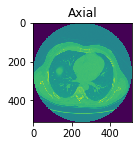

In [17]:
slice_list = []
for files_ in fpath:
    ct_images = os.listdir(files_)
    print(files_)
    slices = [dicom.read_file(files_+'/'+s, force=True) for s in ct_images]
    pixel_spacing = slices[0].PixelSpacing
    slice_thickness = slices[0].SliceThickness
    axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
    image_shape = list(slices[0].pixel_array.shape)
    image_shape.append(len(slices))
    volume3d = np.zeros(image_shape)
    for i,s in enumerate(slices):
        array2d = s.pixel_array
        if i==498 or i==499:
            pass
        else:
            #print("Index",i,array2d.shape)
            volume3d[:,:,i] = array2d
    axial = plt.subplot(2,2,1)
    plt.title('Axial')
    plt.imshow(volume3d[:,:,image_shape[2]//2])
    axial.set_aspect(axial_aspect_ratio)
    break

In [ ]:

plt.plot(np.array(volume3d.reshape(1,-1)))